# Deep Learning: The Perceptron

This is where it all began (Rosenblatt, 1957). 
The **Perceptron** is the simplest possible artificial neuron. It is the building block of all Deep Learning.

### The Formula
$$ z = w_1 x_1 + w_2 x_2 + ... + b $$
$$ y = \text{step}(z) $$

- $w$: Weights (Imporance of inputs)
- $b$: Bias (Shift threshold)
- $\text{step}$: Activation Function (If $z > 0$, fire! Else, stay silent).

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

## Implementing an Artificial "Brain Cell"
No libraries (TensorFlow/PyTorch) yet. Just raw Math.

In [2]:
class Perceptron:
    def __init__(self, learning_rate=0.1, n_iter=10):
        self.lr = learning_rate
        self.n_iter = n_iter

    def fit(self, X, y):
        # Initialize weights (w) and bias (b) to zeros
        self.w_ = np.zeros(X.shape[1])
        self.b_ = 0
        self.errors_ = []

        for _ in range(self.n_iter):
            errors = 0
            for xi, target in zip(X, y):
                # Update Rule: w = w + lr * (target - prediction) * x
                update = self.lr * (target - self.predict(xi))
                self.w_ += update * xi
                self.b_ += update
                errors += int(update != 0.0)
            self.errors_.append(errors)
        return self

    def net_input(self, X):
        # z = w * x + b
        return np.dot(X, self.w_) + self.b_

    def predict(self, X):
        # Step function: Return 1 if z >= 0, else 0
        return np.where(self.net_input(X) >= 0.0, 1, 0)

## Teaching it Logic (The AND Gate)
Can a neuron learn logical "AND"?
- 0, 0 -> 0
- 0, 1 -> 0
- 1, 0 -> 0
- 1, 1 -> 1 (Only fire if BOTH inputs are ON)

In [3]:
# The AND Data
X = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y = np.array([0, 0, 0, 1])

ppn = Perceptron(learning_rate=0.1, n_iter=10)
ppn.fit(X, y)

print("Errors per epoch:", ppn.errors_)

Errors per epoch: [2, 3, 3, 0, 0, 0, 0, 0, 0, 0]


### Visualizing the "Decision Boundary"
The neuron basically draws a straight line to separate 0s from 1s.

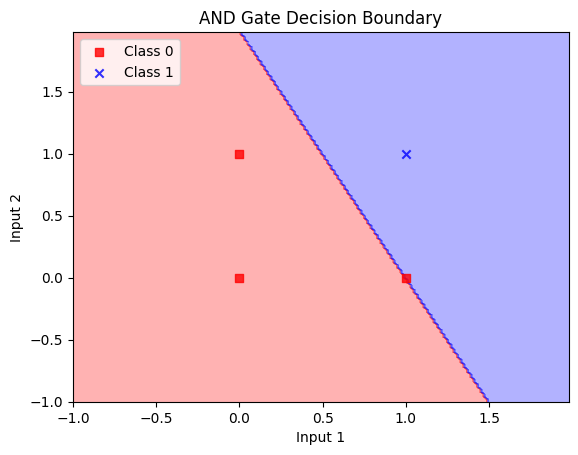

In [7]:
def plot_decision_regions(X, y, classifier, resolution=0.02):
    markers = ('s', 'x', 'o', '^', 'v')
    colors = ('red', 'blue', 'lightgreen', 'gray', 'cyan')
    cmap = ListedColormap(colors[:len(np.unique(y))])

    # Plot the decision surface
    x1_min, x1_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    x2_min, x2_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution),
                           np.arange(x2_min, x2_max, resolution))
    Z = classifier.predict(np.array([xx1.ravel(), xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    plt.contourf(xx1, xx2, Z, alpha=0.3, cmap=cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())

    # Plot class samples
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x=X[y == cl, 0], 
                    y=X[y == cl, 1],
                    alpha=0.8, 
                    c=colors[idx],
                    marker=markers[idx], 
                    label=f'Class {cl}')
    plt.xlabel('Input 1')
    plt.ylabel('Input 2')
    plt.legend(loc='upper left')
    

plot_decision_regions(X, y, classifier=ppn)
plt.title('AND Gate Decision Boundary')
plt.show()

## The Failure (The XOR Problem)
Can a neuron learn "XOR" (Exclusive OR)?
- 0, 0 -> 0
- 0, 1 -> 1
- 1, 0 -> 1
- 1, 1 -> 0 (Fire if inputs are DIFFERENT)

In [5]:
# The XOR Data
X_xor = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
y_xor = np.array([0, 1, 1, 0])

ppn_xor = Perceptron(learning_rate=0.1, n_iter=20)
ppn_xor.fit(X_xor, y_xor)

print("Errors per epoch (XOR):", ppn_xor.errors_)

Errors per epoch (XOR): [3, 3, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4]


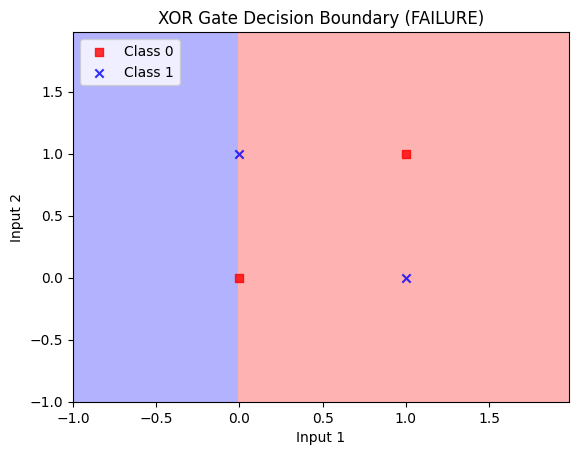

In [8]:
plot_decision_regions(X_xor, y_xor, classifier=ppn_xor)
plt.title('XOR Gate Decision Boundary (FAILURE)')
plt.show()

### Conclusion
It failed! The error never goes to zero.
Why? Because XOR is **Linear Non-Separable**. You cannot draw a SINGLE straight line to separate the blue crosses from the red squares. You need TWO lines.

**Solution:** We need multiple neurons working together. We need a **Multi-Layer Perceptron (MLP)**.